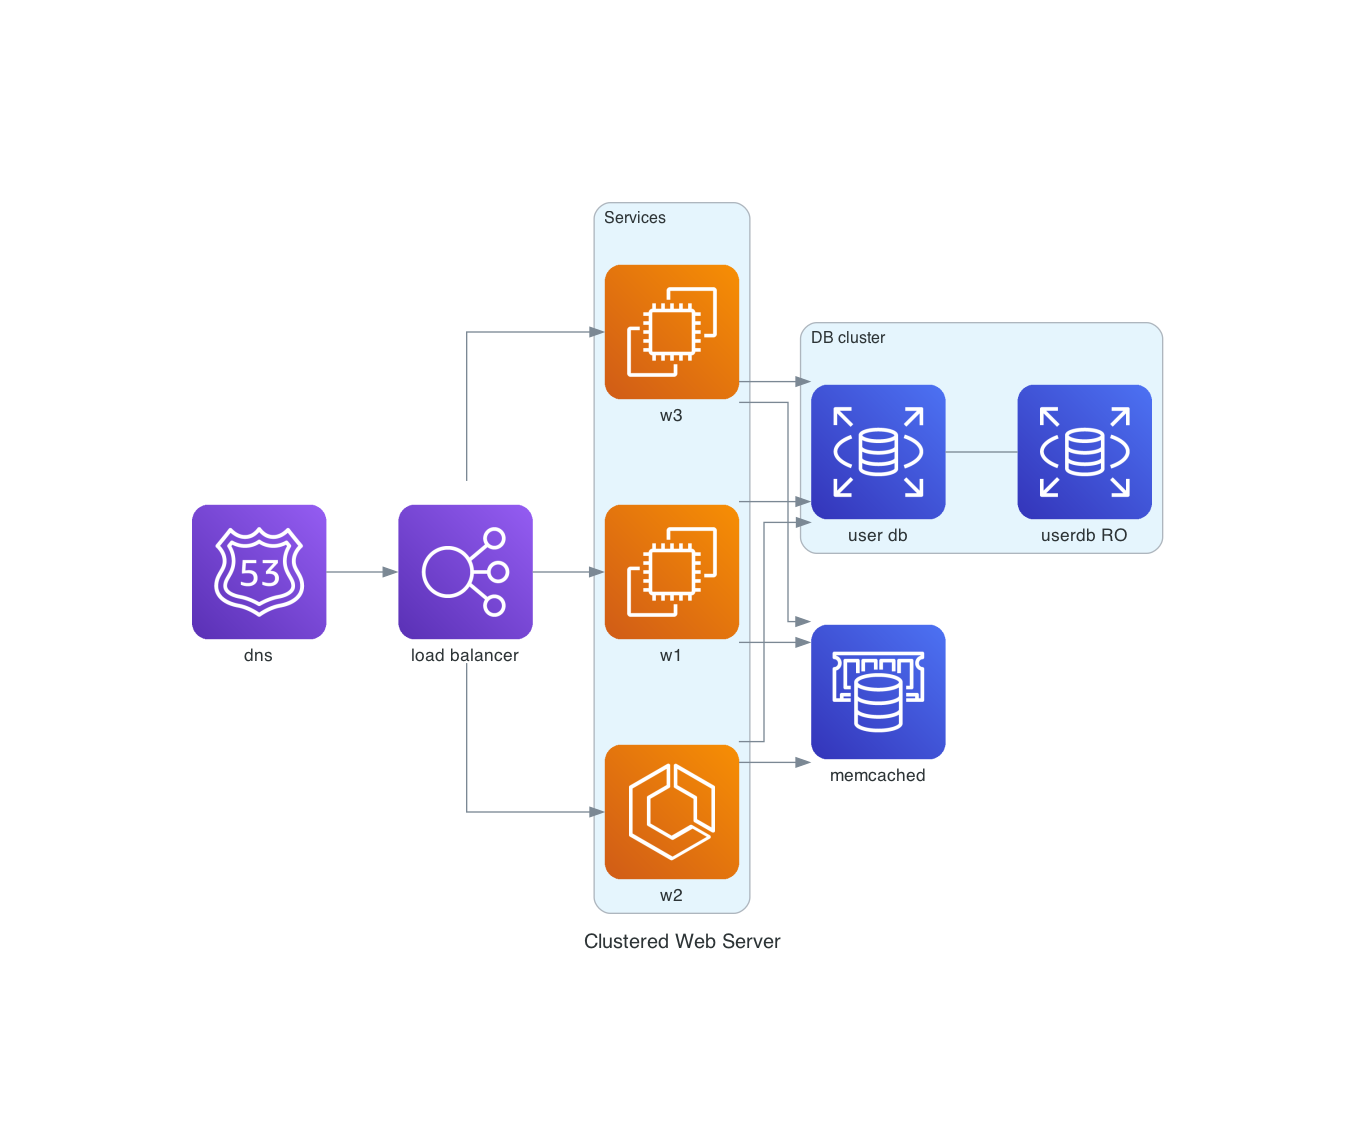

In [2]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2, ECS
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB, Route53

with Diagram("Clustered Web Server", show=False) as diag:
#	ELB("elb") >> [EC2("w1"),
#			EC2("w2"),
#			EC2("w3")] >> RDS("events")


	dns = Route53("dns")
	lb = ELB("load balancer")

	with Cluster("Services"):
		svc_group = [EC2("w1"),
                       ECS("w2"),
                       EC2("w3")]
	
	with Cluster("DB cluster"):
		prim = RDS("user db")
		prim - [RDS("userdb RO")]

	memcached = ElastiCache("memcached")
	
	dns >> lb >> svc_group
	svc_group >> prim
	svc_group >> memcached

diag
